In [2]:
import torch
import torch.nn as nn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("../../Data/NYCTaxiFares.csv")
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [5]:
df["fare_class"].value_counts()

fare_class
0    80000
1    40000
Name: count, dtype: int64

In [6]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [7]:
df['dist_km'] = haversine_distance(df,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [9]:
df["pickup_datetime"].str[:19]

0         2010-04-19 08:17:56
1         2010-04-17 15:43:53
2         2010-04-17 11:23:26
3         2010-04-11 21:25:03
4         2010-04-17 02:19:01
                 ...         
119995    2010-04-18 14:33:03
119996    2010-04-23 10:27:48
119997    2010-04-18 18:50:40
119998    2010-04-13 08:14:44
119999    2010-04-17 16:00:14
Name: pickup_datetime, Length: 120000, dtype: object

In [11]:
df["EDTdate"] = pd.to_datetime(df["pickup_datetime"].str[:19]) - pd.Timedelta(hours=4)
df["Hour"] = df["EDTdate"].dt.hour
df["AMorPM"] = np.where(df["Hour"] > 12, 'am','pm') 
df['Weekday'] = df['EDTdate'].dt.strftime("%a")
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56,4,pm,Mon
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53,11,pm,Sat
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26,7,pm,Sat
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03,17,am,Sun
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01,22,am,Fri


In [13]:
print(df["EDTdate"].min())
print(df["EDTdate"].max())

2010-04-11 00:00:10
2010-04-24 23:59:42


In [14]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [15]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']
y_col = ['fare_class']  # this column contains the labels

In [16]:
for col in cat_cols:
    df[col] = df[col].astype('category')

In [17]:
df.dtypes

pickup_datetime              object
fare_amount                 float64
fare_class                    int64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dist_km                     float64
EDTdate              datetime64[ns]
Hour                       category
AMorPM                     category
Weekday                    category
dtype: object

In [18]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int32): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [20]:
df["AMorPM"].head()

0    pm
1    pm
2    pm
3    am
4    am
Name: AMorPM, dtype: category
Categories (2, object): ['am', 'pm']

In [22]:
df["AMorPM"].head().cat.codes

0    1
1    1
2    1
3    0
4    0
dtype: int8

In [23]:
df["Weekday"].cat.codes

0         1
1         2
2         2
3         3
4         0
         ..
119995    3
119996    0
119997    3
119998    5
119999    2
Length: 120000, dtype: int8

In [24]:
hr = df["Hour"].cat.codes.values
ampm = df["AMorPM"].cat.codes.values
wkdy = df["Weekday"].cat.codes.values

cats = np.stack([hr, ampm, wkdy], axis=1)
cats

array([[ 4,  1,  1],
       [11,  1,  2],
       [ 7,  1,  2],
       ...,
       [14,  0,  3],
       [ 4,  1,  5],
       [12,  1,  2]], dtype=int8)

In [35]:
print([df[col].values for col in cont_cols][0].shape)
print(np.stack([df[col].values for col in cont_cols],axis=1)[0].shape)

(120000,)
(6,)


In [37]:
len(np.stack([df[col].values for col in cont_cols],axis=1))

120000

In [38]:
cats = torch.tensor(cats, dtype=torch.int64)
conts = np.stack([df[col].values for col in cont_cols], axis=1)
conts = torch.tensor(conts, dtype=torch.float)
conts[:2]

tensor([[ 40.7305, -73.9924,  40.7447, -73.9755,   1.0000,   2.1263],
        [ 40.7406, -73.9901,  40.7441, -73.9742,   1.0000,   1.3923]])

In [42]:
conts.type()

'torch.FloatTensor'

In [46]:
# Convert labels to a tensor
y = torch.tensor(df[y_col].values).flatten()
y[:5]

tensor([0, 0, 1, 0, 1])

### Set an embedding size

In [50]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, ((size+1)//2))) for size in cat_szs]
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [52]:
cats[:2]

tensor([[ 4,  1,  1],
        [11,  1,  2]])

In [53]:
embd = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
embd

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [54]:
list(enumerate(embd))

[(0, Embedding(24, 12)), (1, Embedding(2, 1)), (2, Embedding(7, 4))]

In [60]:
cats[:3]

tensor([[ 4,  1,  1],
        [11,  1,  2],
        [ 7,  1,  2]])

In [61]:
catz = cats[:3]
embeddings_lst = []
for i,embedding in enumerate(embd):
    embeddings_lst.append(embedding(catz[:,i]))
embeddings_lst

[tensor([[ 0.3766,  0.5691,  0.5791,  0.0683, -1.0582,  0.4723,  0.2682, -1.5728,
           0.4813, -0.6473, -0.7733,  0.1293],
         [ 1.2372,  0.2229,  1.1766,  0.4966, -2.1167,  0.3638, -0.7911, -1.4114,
          -0.5022,  0.7628, -0.5711, -0.6903],
         [ 0.0768, -1.1967,  0.8582,  1.4102,  0.8084, -0.4349,  1.4526,  1.6856,
          -0.4147, -0.8111,  0.3815,  0.8006]], grad_fn=<EmbeddingBackward0>),
 tensor([[0.6740],
         [0.6740],
         [0.6740]], grad_fn=<EmbeddingBackward0>),
 tensor([[-1.6059,  0.5499, -0.7863,  0.0785],
         [-0.5868, -1.8552,  0.3965, -0.1707],
         [-0.5868, -1.8552,  0.3965, -0.1707]], grad_fn=<EmbeddingBackward0>)]

In [63]:
# We concatenate the embedding sections (12,1,4) into one (17)
z = torch.cat(embeddings_lst, dim=1)
z[0].shape

torch.Size([17])

In [65]:
selfembddrop = nn.Dropout(.4)
z = selfembddrop(z)
z

tensor([[ 0.0000,  0.9484,  0.9651,  0.1138, -0.0000,  0.7872,  0.4469, -2.6213,
          0.8022, -1.0789, -0.0000,  0.0000,  1.1233, -2.6765,  0.9165, -1.3106,
          0.1309],
        [ 0.0000,  0.3714,  0.0000,  0.0000, -0.0000,  0.6063, -0.0000, -2.3524,
         -0.8370,  0.0000, -0.9519, -1.1505,  1.1233, -0.9780, -3.0921,  0.6608,
         -0.0000],
        [ 0.1280, -0.0000,  0.0000,  0.0000,  0.0000, -0.7248,  0.0000,  0.0000,
         -0.6912, -0.0000,  0.0000,  0.0000,  0.0000, -0.9780, -3.0921,  0.6608,
         -0.0000]], grad_fn=<MulBackward0>)

In [66]:
class TabularModel(nn.Module):
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layer_list = []
        n_em = sum((nf for ni, nf in emb_szs))
        n_input = n_em + n_cont
        for i in layers:
            layer_list.append(nn.Linear(n_input, i))
            layer_list.append(nn.ReLU(inplace=True))
            layer_list.append(nn.BatchNorm1d(i))
            layer_list.append(nn.Dropout(p))
            n_input = i
        layer_list.append(nn.Linear(layers[-1], out_sz))
        # layer_list.append(nn.Sigmoid(out_sz))
        
        self.layers = nn.Sequential(*layer_list)

    def forward(self, x_cat, x_cont):
        embeddings = []
        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], dim=1)
        x = self.layers(x)

        return x

In [67]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 2, [200,100], p=0.4) # out_sz = 2

In [68]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [87]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [88]:
batch_size = 60000
test_size = 12000

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [89]:
print(len(cat_train))
print(len(con_test))

48000
12000


In [90]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 0.25806803
epoch:  26  loss: 0.25345138
epoch:  51  loss: 0.24962103
epoch:  76  loss: 0.24709108
epoch: 101  loss: 0.24661984
epoch: 126  loss: 0.24351418
epoch: 151  loss: 0.24197255
epoch: 176  loss: 0.23825964
epoch: 201  loss: 0.23798214
epoch: 226  loss: 0.23632419
epoch: 251  loss: 0.23498838
epoch: 276  loss: 0.23332174
epoch: 300  loss: 0.23222868

Duration: 29 seconds


In [91]:
loss

tensor(0.2322, grad_fn=<NllLossBackward0>)

Text(0.5, 0, 'epoch')

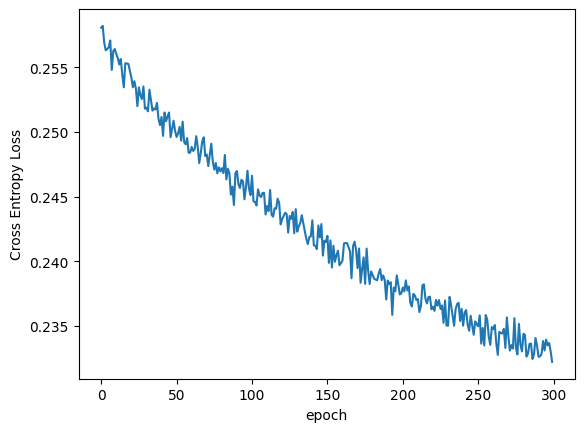

In [93]:
losses_np = [loss.detach().numpy() for loss in losses]
plt.plot(range(epochs), losses_np)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch')

In [95]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(cat_test, con_test)
    print(y_val)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

tensor([[ 3.0734, -1.9216],
        [-3.8605,  2.8427],
        [ 3.0357, -1.1271],
        ...,
        [ 2.2084, -2.4079],
        [ 2.0753, -1.7619],
        [-2.5327,  2.0578]])
CE Loss: 0.23398522


In [96]:
y_test

tensor([0, 0, 0,  ..., 0, 0, 1])

In [97]:
rows = 50
correct = 0
print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')
for i in range(rows):
    print(f'{str(y_val[i]):26} {y_val[i].argmax():^7}{y_test[i]:^7}')
    if y_val[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')

MODEL OUTPUT               ARGMAX  Y_TEST
tensor([ 3.0734, -1.9216])    0      0   
tensor([-3.8605,  2.8427])    1      0   
tensor([ 3.0357, -1.1271])    0      0   
tensor([-0.6620,  1.4548])    1      1   
tensor([ 2.1988, -1.4531])    0      0   
tensor([ 1.6100, -1.7300])    0      0   
tensor([ 1.2641, -2.5168])    0      0   
tensor([-2.2311,  1.2461])    1      1   
tensor([ 1.8583, -1.8221])    0      0   
tensor([-1.0291,  0.4111])    1      1   
tensor([ 1.4603, -1.9841])    0      0   
tensor([ 2.4055, -2.1078])    0      0   
tensor([ 1.7564, -1.1685])    0      0   
tensor([-1.9592,  0.7499])    1      1   
tensor([ 2.4076, -2.9363])    0      0   
tensor([-1.7842,  4.4125])    1      1   
tensor([ 3.4829, -0.7813])    0      1   
tensor([ 2.3166, -2.3234])    0      0   
tensor([ 1.2394, -1.2596])    0      0   
tensor([ 1.8516, -1.5317])    0      0   
tensor([-2.3978,  1.5948])    1      1   
tensor([-1.7031,  0.7557])    1      1   
tensor([-3.2177,  2.7018])    1   